# H2O Machine Learning

In [1]:
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import textwrap
import h2o

In [2]:
## Enable inline plotting for graphics
%matplotlib inline
## So all output comes through from Ipython
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
## Get Version information
print(textwrap.fill(sys.version),'\n')
print("Pandas version: {0}".format(pd.__version__))
print("Matplotlib version: {0}".format(matplotlib.__version__))
print("Numpy version: {0}".format(np.__version__))
print("Seaborn version: {0}".format(sns.__version__))
print("h2o version: {0}".format(h2o.__version__))

3.6.7 |Anaconda custom (64-bit)| (default, Oct 23 2018, 14:01:38)
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)] 

Pandas version: 0.23.4
Matplotlib version: 3.0.2
Numpy version: 1.15.4
Seaborn version: 0.9.0
h2o version: 3.22.1.4


In [4]:
# Working Directory
import os
print("My working director:\n" + os.getcwd())
os.chdir(r"/Users/wenhuizeng/Library/Mobile Documents/com~apple~CloudDocs/high performance/week14")
print("My working director:\n" + os.getcwd())

My working director:
/Users/wenhuizeng/High Performance
My working director:
/Users/wenhuizeng/Library/Mobile Documents/com~apple~CloudDocs/high performance/week14


In [5]:
pd.options.display.max_rows = 10

# Initiating H2O Session
## Initiate Cluster

In [12]:
h2o.init(ip='localhost',port = 54321, nthreads = -1, max_mem_size='2G')

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,13 days 16 hours 45 mins
H2O cluster timezone:,America/Chicago
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.4
H2O cluster version age:,2 months and 6 days
H2O cluster name:,H2O_from_python_wenhuizeng_3b4o0z
H2O cluster total nodes:,1
H2O cluster free memory:,1.759 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [14]:
h2o.cluster().show_status()

H2O cluster uptime:,13 days 16 hours 45 mins
H2O cluster timezone:,America/Chicago
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.4
H2O cluster version age:,2 months and 6 days
H2O cluster name:,H2O_from_python_wenhuizeng_3b4o0z
H2O cluster total nodes:,1
H2O cluster free memory:,1.759 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [16]:
tx_housing_h20 =  h2o.import_file('txhousing.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [17]:
h2o.ls()

,key
0,AutoML_Feedback_automl_py_23_sid_a01e
1,AutoML_Feedback_dummy
2,AutoML_Leaderboard_automl_py_23_sid_a01e
3,AutoML_Leaderboard_null
4,DRF_1_AutoML_20190408_181500
...,...
237,tx_glm_2
238,tx_housing_h20_imputed
239,txhousing.hex
240,txhousing1.hex


In [21]:
tx_housing_h20.summary()
tx_housing_h20.shape
tx_housing_h20['city'].unique()

,city,year,month,sales,volume,median,listings,inventory,date
type,enum,int,int,int,int,int,int,real,real
mins,,2000.0,1.0,6.0,835000.0,50000.0,0.0,0.0,2000.0
mean,,2007.2994652406417,6.406417112299464,549.5646004480957,106858620.78080651,128131.44252441774,3216.902340484815,7.174590049053961,2007.750000000001
maxs,,2015.0,12.0,8945.0,2568156780.0,304200.0,43107.0,55.9,2015.5
sigma,,4.502922839228756,3.441932239881674,1110.7371785966693,244933668.96811643,37359.57531677765,5968.331071761769,4.612124949342226,4.498718025583444
zeros,,0,0,0,0,0,1,1,0
missing,0,0,0,568,568,616,1424,1467,0
0,Abilene,2000.0,1.0,72.0,5380000.0,71400.0,701.0,6.3,2000.0
1,Abilene,2000.0,2.0,98.0,6505000.0,58700.0,746.0,6.6,2000.08333333333
2,Abilene,2000.0,3.0,130.0,9285000.0,58100.0,784.0,6.8,2000.16666666667


(8602, 9)

C1
Abilene
Amarillo
Arlington
Austin
Bay Area
Beaumont
Brazoria County
Brownsville
Bryan-College Station
Collin County


In [23]:
tx_housing_h20['city'].table().head()
tx_housing_h20['city'].table().tail()

city,Count
Abilene,187
Amarillo,187
Arlington,187
Austin,187
Bay Area,187
Beaumont,187
Brazoria County,187
Brownsville,187
Bryan-College Station,187
Collin County,187


city,Count
San Antonio,187
San Marcos,187
Sherman-Denison,187
South Padre Island,187
Temple-Belton,187
Texarkana,187
Tyler,187
Victoria,187
Waco,187
Wichita Falls,187


In [24]:
list(zip(tx_housing_h20.nacnt(),
        tx_housing_h20.names))

[(0.0, 'city'),
 (0.0, 'year'),
 (0.0, 'month'),
 (568.0, 'sales'),
 (568.0, 'volume'),
 (616.0, 'median'),
 (1424.0, 'listings'),
 (1467.0, 'inventory'),
 (0.0, 'date')]

In [32]:
tx_housing_h20_imputed =  h2o.deep_copy(tx_housing_h20,'tx_housing_h20_imputed')
tx_housing_h20_imputed.impute()
h2o.ls()
list(zip(tx_housing_h20_imputed.nacnt(),
        tx_housing_h20_imputed.names))

[0.0,
 2007.2994652406417,
 6.406417112299464,
 549.5646004480957,
 106858620.78080651,
 128131.44252441774,
 3216.902340484815,
 7.174590049053961,
 2007.750000000001]

,key
0,AutoML_Feedback_automl_py_23_sid_a01e
1,AutoML_Feedback_dummy
2,AutoML_Leaderboard_automl_py_23_sid_a01e
3,AutoML_Leaderboard_null
4,DRF_1_AutoML_20190408_181500
...,...
244,tx_housing_h20_imputed
245,tx_housing_h2o_imputed
246,txhousing.hex
247,txhousing1.hex


[(0.0, 'city'),
 (0.0, 'year'),
 (0.0, 'month'),
 (0.0, 'sales'),
 (0.0, 'volume'),
 (0.0, 'median'),
 (0.0, 'listings'),
 (0.0, 'inventory'),
 (0.0, 'date')]

# Group By functionality

In [37]:
tx_group_year = tx_housing_h20_imputed.group_by('year')
tx_group_year.count()
tx_group_year.get_frame()

GroupBy: 
  Frame: tx_housing_h20_imputed; by=[1]
  Aggregates: dict_keys(['nrow_city'])
*** Use get_frame() to get groupby frame ***


year,nrow
2000,552
2001,552
2002,552
2003,552
2004,552
2005,552
2006,552
2007,552
2008,552
2009,552


In [38]:
tx_group_year = tx_housing_h20_imputed.group_by('year')
tx_group_year.mean()
tx_group_year.get_frame()

GroupBy: 
  Frame: tx_housing_h20_imputed; by=[1]
  Aggregates: dict_keys(['mean_city', 'mean_month', 'mean_sales', 'mean_volume', 'mean_median', 'mean_listings', 'mean_inventory', 'mean_date'])
*** Use get_frame() to get groupby frame ***


year,mean_city,mean_month,mean_sales,mean_volume,mean_median,mean_listings,mean_inventory,mean_date
2000,22.5,6.5,489.665,7.72448e+07,102298,2390.69,6.57071,2000.46
2001,22.5,6.5,503.924,8.13185e+07,105802,2819.8,6.72983,2001.46
2002,22.5,6.5,535.51,8.99641e+07,109747,3299.48,6.50802,2002.46
2003,22.5,6.5,540.623,9.11771e+07,110961,3561.17,6.75151,2003.46
2004,22.5,6.5,574.226,9.84143e+07,112948,3744.97,6.66655,2004.46
2005,22.5,6.5,627.304,1.13065e+08,119355,3872.93,6.21191,2005.46
2006,22.5,6.5,658.823,1.23798e+08,124467,4073.55,6.25262,2006.46
2007,22.5,6.5,617.555,1.21302e+08,130069,4303.37,6.4835,2007.46
2008,22.5,6.5,521.115,1.02058e+08,131177,3976.02,7.27675,2008.46
2009,22.5,6.5,470.381,8.93212e+07,131423,3319.98,8.34585,2009.46


In [40]:
tx_housing_h20_imputed['city'] = tx_housing_h20_imputed['city'].asfactor()
train,text,validate = tx_housing_h20.split_frame([0.5,0.25],seed=12)
train
train.shape
h2o.ls()

city,year,month,sales,volume,median,listings,inventory,date
Abilene,2000,1,72,5.38e+06,71400,701,6.3,2000
Abilene,2000,3,130,9.285e+06,58100,784,6.8,2000.17
Abilene,2000,5,141,1.059e+07,67300,794,6.8,2000.33
Abilene,2000,6,156,1.391e+07,66900,780,6.6,2000.42
Abilene,2000,9,104,7.615e+06,64500,771,6.5,2000.67
Abilene,2001,2,112,8.67e+06,68900,700,6,2001.08
Abilene,2001,3,118,9.55e+06,72300,738,6.4,2001.17
Abilene,2001,5,150,1.185e+07,71000,772,6.6,2001.33
Abilene,2001,6,139,1.129e+07,78100,825,7.2,2001.42
Abilene,2001,7,134,1.3175e+07,86700,801,7.1,2001.5


(4320, 9)

,key
0,AutoML_Feedback_automl_py_23_sid_a01e
1,AutoML_Feedback_dummy
2,AutoML_Leaderboard_automl_py_23_sid_a01e
3,AutoML_Leaderboard_null
4,DRF_1_AutoML_20190408_181500
...,...
252,tx_housing_h20_imputed
253,tx_housing_h2o_imputed
254,txhousing.hex
255,txhousing1.hex


In [50]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

target='median'
inputs = ['city','year','month','inventory']
glm_mod1 = H2OGeneralizedLinearEstimator(model_id = 'tx_glm_1',
                                        family='gaussian',
                                        lambda_=0,
                                        compute_p_values=True)

glm_mod1.train(x=inputs,
               y=target,
               training_frame=train,
               validation_frame = validate)
glm_mod1._model_json['output']['coefficients_table'].as_data_frame()


glm Model Build progress: |███████████████████████████████████████████████| 100%


,names,coefficients,std_error,z_value,p_value,standardized_coefficients
0,Intercept,-8.058865e+06,98482.375461,-81.830530,0.000000e+00,97519.314241
1,city.Amarillo,1.609054e+04,1934.063062,8.319551,1.199656e-16,16090.537084
2,city.Arlington,2.801576e+04,1995.562343,14.039031,9.814911e-44,28015.762537
3,city.Austin,8.072163e+04,1940.229947,41.604154,2.296686e-314,80721.625235
4,city.Bay Area,4.872531e+04,1971.824648,24.710773,1.566538e-125,48725.311183
...,...,...,...,...,...,...
44,city.Waco,1.263146e+04,2152.303229,5.868809,4.747651e-09,12631.456706
45,city.Wichita Falls,-6.106386e+03,1960.714694,-3.114367,1.856522e-03,-6106.385945
46,year,4.063508e+03,49.054095,82.837290,0.000000e+00,18293.098439
47,month,7.310900e+02,62.548982,11.688279,4.689694e-31,2503.739073


/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


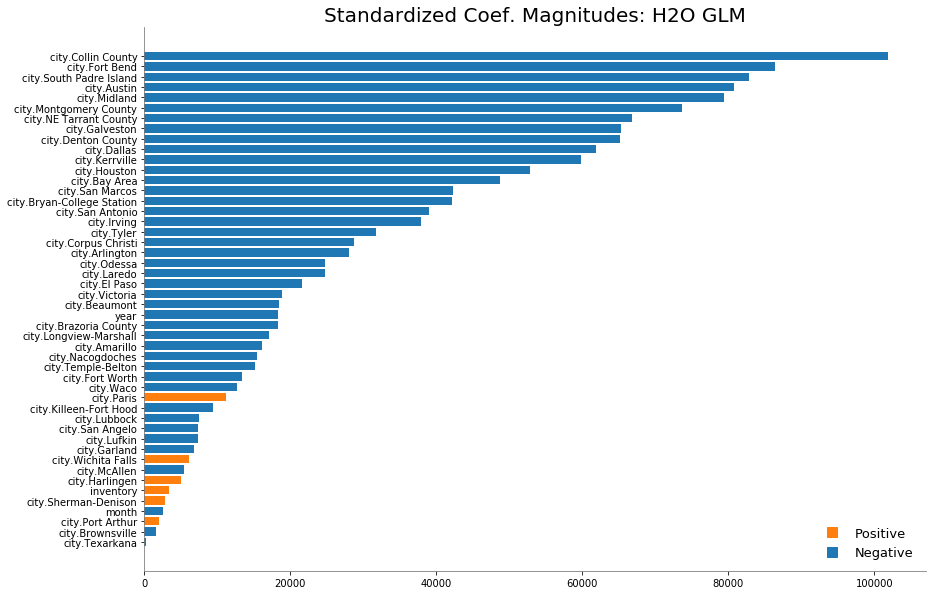

In [51]:
glm_mod1.std_coef_plot()

In [53]:
glm_mod1._model_json['output']['model_summary'].as_data_frame()
glm_mod1._model_json['output']['training_metrics']
glm_mod1._model_json['output']['validation_metrics']

,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,gaussian,identity,None,48,48,1,py_35_sid_96a9



ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 193527113.0675373
RMSE: 13911.402268194868
MAE: 10107.180963167082
RMSLE: 0.11278266281710904
R^2: 0.8626508340794823
Mean Residual Deviance: 193527113.0675373
Null degrees of freedom: 4022
Residual degrees of freedom: 3974
Null deviance: 5668469631051.454
Residual deviance: 778559575870.7026
AIC: 88279.35350562254



ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 200272063.7770598
RMSE: 14151.751261842464
MAE: 10303.633215497006
RMSLE: 0.11582271437718594
R^2: 0.8535805966425554
Mean Residual Deviance: 200272063.7770598
Null degrees of freedom: 1976
Residual degrees of freedom: 1928
Null deviance: 2706948666694.326
Residual deviance: 395937870087.2472
AIC: 43501.20828995842


In [64]:
target = 'median'
inputs = ['city','year','month','inventory']
glm_mod2 = H2OGeneralizedLinearEstimator(model_id='tx_glm_2',
                                        family='gaussian',
                                        interactions = ['month','median'],
                                        lambda_=0,
                                        compute_p_values=True)

glm_mod2.train(x = inputs,
               y = target,
               training_frame = train,
               validation_frame = validate)


glm_mod2._model_json['output']['coefficients_table'].as_data_frame()

glm Model Build progress: |███████████████████████████████████████████████| 100%


,names,coefficients,std_error,z_value,p_value,standardized_coefficients
0,Intercept,-5.415772e+06,101387.672884,-53.416471,0.000000e+00,107782.311411
1,city.Amarillo,1.076648e+04,1608.852037,6.692025,2.508633e-11,10766.477337
2,city.Arlington,1.861383e+04,1669.037577,11.152430,1.836055e-28,18613.825373
3,city.Austin,5.296759e+04,1728.533253,30.643084,2.665235e-185,52967.589825
4,city.Bay Area,3.165632e+04,1680.966917,18.832210,7.552790e-76,31656.322824
...,...,...,...,...,...,...
45,city.Wichita Falls,-5.143954e+03,1626.552750,-3.162488,1.576058e-03,-5143.953665
46,month_median,5.158291e-02,0.001172,44.014418,0.000000e+00,26597.688394
47,year,2.751227e+03,50.444174,54.540033,0.000000e+00,12385.471134
48,month,-5.954307e+03,160.508144,-37.096606,6.409868e-259,-20391.515151


# Elastic Net

In [67]:
target = 'median'
inputs = ['city','year','month','inventory']
glm_mod3 = H2OGeneralizedLinearEstimator(model_id='tx_glm_3',
                                        family='gaussian',
                                        interactions=['month','median'],
                                        lambda_=1,
                                        alpha = 0.5)

glm_mod3.train(x=inputs,y=target,
              training_frame=train,
              validation_frame=validate)

glm_mod3._model_json['output']['coefficients_table'].as_data_frame()
glm_mod3._model_json['output']['training_metrics']
glm_mod3._model_json['output']['validation_metrics']

glm Model Build progress: |███████████████████████████████████████████████| 100%


,names,coefficients,standardized_coefficients
0,Intercept,-4.521991e+06,127288.615988
1,city.Abilene,-1.050757e+03,-1050.756634
2,city.Amarillo,-4.937550e+02,-493.754976
3,city.Arlington,-7.048610e+01,-70.486097
4,city.Austin,1.731223e+03,1731.222581
...,...,...,...
46,city.Wichita Falls,-1.201415e+03,-1201.414791
47,month_median,2.770266e-02,14284.320022
48,year,2.312798e+03,10411.753315
49,month,-1.838086e+03,-6294.831106



ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 705283176.763632
RMSE: 26557.168086293237
MAE: 20852.654827994196
RMSLE: 0.20436447950156228
R^2: 0.4994496919279102
Mean Residual Deviance: 705283176.763632
Null degrees of freedom: 4022
Residual degrees of freedom: 3972
Null deviance: 5668469631051.454
Residual deviance: 2837354220120.092
AIC: 93485.82376418804



ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 687817608.9283113
RMSE: 26226.277069540603
MAE: 20566.731906605444
RMSLE: 0.20007166789446146
R^2: 0.49713483738732334
Mean Residual Deviance: 687817608.9283113
Null degrees of freedom: 1976
Residual degrees of freedom: 1926
Null deviance: 2706948666694.326
Residual deviance: 1359815412851.2715
AIC: 45944.52368726923


# HyperParameter Tuning
## lambda search

In [68]:
target = 'median'
inputs = ['city','year','month','inventory']

glm_mod4 = H2OGeneralizedLinearEstimator(model_id='tx_glm_3',
                                        family='gaussian',
                                        interactions = ['month','median'],
                                        lambda_search=True,
                                        alpha=0.5)

glm_mod4.train(x=inputs,
              y=target,
              training_frame = train,
              validation_frame=validate)

glm_mod4._model_json['output']['coefficients_table'].as_data_frame()
glm_mod4._model_json['output']['training_metrics']
glm_mod4._model_json['output']['validation_metrics']

glm_mod4._model_json['output']['lambda_best']

glm Model Build progress: |███████████████████████████████████████████████| 100%


,names,coefficients,standardized_coefficients
0,Intercept,128020.730798,128020.730798
1,city.Abilene,0.000000,0.000000
2,city.Amarillo,0.000000,0.000000
3,city.Arlington,0.000000,0.000000
4,city.Austin,0.000000,0.000000
...,...,...,...
46,city.Wichita Falls,0.000000,0.000000
47,month_median,0.000000,0.000000
48,year,0.000000,0.000000
49,month,0.000000,0.000000



ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 1409015568.2454522
RMSE: 37536.85613161353
MAE: 29522.05693474304
RMSLE: 0.2903660102860821
R^2: 5.551115123125783e-16
Mean Residual Deviance: 1409015568.2454522
Null degrees of freedom: 4022
Residual degrees of freedom: 4022
Null deviance: 5668469631051.454
Residual deviance: 5668469631051.454
AIC: 96169.92952768864



ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 1369220367.5742671
RMSE: 37002.97782036288
MAE: 29041.002550961708
RMSLE: 0.28353168020363245
R^2: -0.0010404122476979083
Mean Residual Deviance: 1369220367.5742671
Null degrees of freedom: 1976
Residual degrees of freedom: 1976
Null deviance: 2706948666694.326
Residual deviance: 2706948666694.326
AIC: 47205.63497154766


35087.90394193229

In [69]:
target = 'median'
inputs = ['city','year','month','inventory']

glm_mod4 = H2OGeneralizedLinearEstimator(model_id='tx_glm_3',
                                        family='gaussian',
                                        interactions = ['month','median'],
                                        lambda_search=True,
                                        alpha=1)

glm_mod4.train(x=inputs,
              y=target,
              training_frame = train,
              validation_frame=validate)

glm_mod4._model_json['output']['coefficients_table'].as_data_frame()
glm_mod4._model_json['output']['training_metrics']
glm_mod4._model_json['output']['validation_metrics']

glm_mod4._model_json['output']['lambda_best']

glm Model Build progress: |███████████████████████████████████████████████| 100%


,names,coefficients,standardized_coefficients
0,Intercept,128020.730798,128020.730798
1,city.Abilene,0.000000,0.000000
2,city.Amarillo,0.000000,0.000000
3,city.Arlington,0.000000,0.000000
4,city.Austin,0.000000,0.000000
...,...,...,...
46,city.Wichita Falls,0.000000,0.000000
47,month_median,0.000000,0.000000
48,year,0.000000,0.000000
49,month,0.000000,0.000000



ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 1409015568.2454522
RMSE: 37536.85613161353
MAE: 29522.05693474304
RMSLE: 0.2903660102860821
R^2: 5.551115123125783e-16
Mean Residual Deviance: 1409015568.2454522
Null degrees of freedom: 4022
Residual degrees of freedom: 4022
Null deviance: 5668469631051.454
Residual deviance: 5668469631051.454
AIC: 96169.92952768864



ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 1369220367.5742671
RMSE: 37002.97782036288
MAE: 29041.002550961708
RMSLE: 0.28353168020363245
R^2: -0.0010404122476979083
Mean Residual Deviance: 1369220367.5742671
Null degrees of freedom: 1976
Residual degrees of freedom: 1976
Null deviance: 2706948666694.326
Residual deviance: 2706948666694.326
AIC: 47205.63497154766


17543.951970966144

# Grid Search logistic regression with lambda search

In [71]:
from h2o.grid.grid_search import H2OGridSearch
target = 'median'
inputs = ['city','year','month','inventory']
glm_parms = {'alpha':[0,0.25,0.5,0.75]}

glm_mod6 = H2OGridSearch(model=H2OGeneralizedLinearEstimator(family='gaussian',lambda_search=True,
                                                            interactions=['month','median']),
                        hyper_params=glm_parms)

glm_mod6.train(x=inputs,
              y=target,
              training_frame=train,
              validation_frame = validate)
glm_mod6.show()

glm Grid Build progress: |████████████████████████████████████████████████| 100%
      alpha                                                     model_ids  \
0     [0.0]  Grid_GLM_py_35_sid_96a9_model_python_1554763622517_4_model_1   
1     [0.5]  Grid_GLM_py_35_sid_96a9_model_python_1554763622517_4_model_3   
2    [0.25]  Grid_GLM_py_35_sid_96a9_model_python_1554763622517_4_model_2   
3    [0.75]  Grid_GLM_py_35_sid_96a9_model_python_1554763622517_4_model_4   

       residual_deviance  
0  2.7069325701358223E12  
1   2.706948666694326E12  
2   2.706948666694326E12  
3   2.706948666694326E12  


In [72]:
## select first (top performing) model
glm_best = glm_mod6.get_grid()[0]
## summarize model
glm_best._model_json['output']['coefficients_table'].as_data_frame()
glm_best._model_json['output']['training_metrics']
glm_best._model_json['output']['validation_metrics']

,names,coefficients,standardized_coefficients
0,Intercept,1.279737e+05,128020.723498
1,city.Abilene,-4.170717e-03,-0.004171
2,city.Amarillo,-1.729924e-03,-0.001730
3,city.Arlington,4.277459e-06,0.000004
4,city.Austin,6.869064e-03,0.006869
...,...,...,...
46,city.Wichita Falls,-4.541573e-03,-0.004542
47,month_median,2.099625e-07,0.108263
48,year,2.334467e-02,0.105093
49,month,3.102245e-03,0.010624



ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 1409007182.241637
RMSE: 37536.74442784879
MAE: 29521.969593877493
RMSLE: 0.2903651357862628
R^2: 5.951675769111375e-06
Mean Residual Deviance: 1409007182.241637
Null degrees of freedom: 4022
Residual degrees of freedom: 3972
Null deviance: 5668469631051.454
Residual deviance: 5668435894158.105
AIC: 96269.90558402578



ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 1369212225.663036
RMSE: 37002.867803226225
MAE: 29040.917560069796
RMSLE: 0.2835308233248488
R^2: -0.0010344596761702185
Mean Residual Deviance: 1369212225.663036
Null degrees of freedom: 1976
Residual degrees of freedom: 1926
Null deviance: 2706948666694.326
Residual deviance: 2706932570135.8223
AIC: 47305.623215509884


# Gradient Boosting Machine Learning

In [75]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

gbm_regressor = H2OGradientBoostingEstimator(distribution='gaussian',
                                             ntrees=10,max_depth=3,
                                             min_rows=2,learn_rate=0.2)

gbm_regressor.train(x=inputs,
                   y=target,
                   training_frame=train,
                   validation_frame=validate)




gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [76]:
gbm_regressor

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1554763622517_5


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 182083273.9810757
RMSE: 13493.823549353077
MAE: 10033.612777311708
RMSLE: 0.11334033671987986
Mean Residual Deviance: 182083273.9810757

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 193293567.75302917
RMSE: 13903.005709307221
MAE: 10192.11875481978
RMSLE: 0.11391136173269892
Mean Residual Deviance: 193293567.75302917
Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2019-04-22 12:40:15,0.014 sec,0.0,37536.8561316,29522.0569347,1409015568.2454522,37002.9778204,29041.0025510,1369220367.5742671
,2019-04-22 12:40:15,0.084 sec,1.0,31952.4038861,24943.7774282,1020956114.1006438,31535.9301133,24564.6094839,994514888.1140742
,2019-04-22 12:40:15,0.097 sec,2.0,27449.9187586,21275.4325830,753498039.8512720,27233.6945271,21076.3033689,741674117.5963931
,2019-04-22 12:40:15,0.108 sec,3.0,24044.4288452,18596.0472032,578134558.4923236,24007.3566705,18490.2085635,576353174.3031219
,2019-04-22 12:40:15,0.118 sec,4.0,21339.9729914,16272.1506746,455394447.2736584,21411.7171627,16264.2097893,458461631.8560150
,2019-04-22 12:40:15,0.127 sec,5.0,19128.3926480,14515.0280458,365895405.2948200,19279.6972103,14538.5345548,371706724.5201926
,2019-04-22 12:40:15,0.145 sec,6.0,17435.5359045,13202.3673176,303997912.2759082,17618.6729249,13251.1036175,310417635.6331323
,2019-04-22 12:40:16,0.168 sec,7.0,16092.7463248,12138.8016367,258976484.2739876,16325.2961228,12189.3413183,266515293.4979458
,2019-04-22 12:40:16,0.192 sec,8.0,15043.2237973,11331.0591521,226298582.2153036,15329.2440698,11395.5601914,234985723.7509097
,2019-04-22 12:40:16,0.203 sec,9.0,14164.7789900,10622.1251456,200640963.8346497,14496.7000309,10714.7574002,210154311.7868931


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
city,9527015505920.0000000,1.0,0.7167035
year,3731886702592.0000000,0.3917162,0.2807444
inventory,17425932288.0000000,0.0018291,0.0013109
month,16498612224.0000000,0.0017318,0.0012412


In [79]:
gbm_regressor.score_history()

,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
0,,2019-04-22 12:40:15,0.014 sec,0.0,37536.856132,29522.056935,1.409016e+09,37002.977820,29041.002551,1.369220e+09
1,,2019-04-22 12:40:15,0.084 sec,1.0,31952.403886,24943.777428,1.020956e+09,31535.930113,24564.609484,9.945149e+08
2,,2019-04-22 12:40:15,0.097 sec,2.0,27449.918759,21275.432583,7.534980e+08,27233.694527,21076.303369,7.416741e+08
3,,2019-04-22 12:40:15,0.108 sec,3.0,24044.428845,18596.047203,5.781346e+08,24007.356670,18490.208563,5.763532e+08
4,,2019-04-22 12:40:15,0.118 sec,4.0,21339.972991,16272.150675,4.553944e+08,21411.717163,16264.209789,4.584616e+08
...,...,...,...,...,...,...,...,...,...,...
6,,2019-04-22 12:40:15,0.145 sec,6.0,17435.535904,13202.367318,3.039979e+08,17618.672925,13251.103617,3.104176e+08
7,,2019-04-22 12:40:16,0.168 sec,7.0,16092.746325,12138.801637,2.589765e+08,16325.296123,12189.341318,2.665153e+08
8,,2019-04-22 12:40:16,0.192 sec,8.0,15043.223797,11331.059152,2.262986e+08,15329.244070,11395.560191,2.349857e+08
9,,2019-04-22 12:40:16,0.203 sec,9.0,14164.778990,10622.125146,2.006410e+08,14496.700031,10714.757400,2.101543e+08


# Grid Search

In [81]:
gbm_hyperparms = {'ntrees':[4,6,8,10],
                 'max_depth':[3,5,7],
                 'learn_rate':[0.1,0.2,0.3,0.4]}

gbmm_mod = H2OGridSearch(model=H2OGradientBoostingEstimator(distribution='gaussian',
                                                           min_rows=2),
                        hyper_params=gbm_hyperparms)

gbmm_mod.train(x=inputs,y=target,training_frame=train,
              validation_frame=validate)
gbmm_mod.show()

gbm Grid Build progress: |████████████████████████████████████████████████| 100%
      learn_rate max_depth ntrees  \
0            0.4         7     10   
1            0.4         7      8   
2            0.3         7     10   
3            0.4         7      6   
4            0.4         5     10   
.. ..        ...       ...    ...   
43           0.1         5      6   
44           0.1         3      6   
45           0.1         7      4   
46           0.1         5      4   
47           0.1         3      4   

                                                        model_ids  \
0   Grid_GBM_py_35_sid_96a9_model_python_1554763622517_6_model_48   
1   Grid_GBM_py_35_sid_96a9_model_python_1554763622517_6_model_36   
2   Grid_GBM_py_35_sid_96a9_model_python_1554763622517_6_model_47   
3   Grid_GBM_py_35_sid_96a9_model_python_1554763622517_6_model_24   
4   Grid_GBM_py_35_sid_96a9_model_python_1554763622517_6_model_44   
..                                                          

# AutoML

In [83]:
from h2o.automl.autoh2o import H2OAutoML
automl_1 = H2OAutoML(max_runtime_secs=60)
automl_1.train(x=inputs,y=target,training_frame = train,
              validation_frame = validate)

automl_1.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GBM_3_AutoML_20190422_134032,9.96337e+07,9981.67,9.96337e+07,6669.73,0.0830695
GBM_2_AutoML_20190422_134032,9.9852e+07,9992.6,9.9852e+07,6635,0.0829577
GBM_1_AutoML_20190422_134032,1.01645e+08,10081.9,1.01645e+08,6699.99,0.0836996
GBM_4_AutoML_20190422_134032,1.07725e+08,10379.1,1.07725e+08,7043.38,0.0861711
GBM_5_AutoML_20190422_134032,1.1494e+08,10721,1.1494e+08,7254.28,0.0860541
GBM_grid_1_AutoML_20190422_134032_model_4,1.47875e+08,12160.4,1.47875e+08,8521.11,0.0998237
GBM_grid_1_AutoML_20190422_134032_model_1,1.70958e+08,13075.1,1.70958e+08,9516.31,0.105516
DeepLearning_1_AutoML_20190422_134032,1.85132e+08,13606.3,1.85132e+08,10157.1,0.110624
DRF_1_AutoML_20190422_134032,2.19337e+08,14810,2.19337e+08,10184.8,0.125362
DeepLearning_grid_1_AutoML_20190422_134032_model_1,2.55299e+08,15978.1,2.55299e+08,11947.1,0.134326


In [84]:
automl_1.leader
automl_1.leader.cross_validation_metrics_summary()
automl_1.leader.scoring_history()
automl_1.leader.score_history()

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_3_AutoML_20190422_134032


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 49592544.97962926
RMSE: 7042.197453893867
MAE: 4762.975152637957
RMSLE: 0.05926387580211508
Mean Residual Deviance: 49592544.97962926

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 100659805.94025932
RMSE: 10032.936057817737
MAE: 6712.4930380245705
RMSLE: 0.08417395442646769
Mean Residual Deviance: 100659805.94025932

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 99633696.24406868
RMSE: 9981.668009108933
MAE: 6669.729934415126
RMSLE: 0.08306945623825662
Mean Residual Deviance: 99633696.24406868
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,6669.776,35.863438,6630.8096,6744.496,6666.713,6704.5024,6602.359
mean_residual_deviance,99633584.0000000,3994398.5,107856032.0000000,103074056.0000000,100517040.0000000,93917352.0000000,92803432.0000000
mse,99633584.0000000,3994398.5,107856032.0000000,103074056.0000000,100517040.0000000,93917352.0000000,92803432.0000000
r2,0.9292149,0.0031258,0.9245942,0.9279665,0.9250302,0.9360782,0.9324057
residual_deviance,99633584.0000000,3994398.5,107856032.0000000,103074056.0000000,100517040.0000000,93917352.0000000,92803432.0000000
rmse,9977.657,199.93263,10385.376,10152.539,10025.818,9691.097,9633.454
rmsle,0.0830581,0.0010136,0.0831745,0.0846636,0.0839110,0.0804216,0.0831197


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2019-04-22 13:40:51,1.278 sec,0.0,37536.8561316,29522.0569347,1409015568.2454522,37002.9778204,29041.0025510,1369220367.5742671
,2019-04-22 13:40:51,1.291 sec,5.0,25006.3549568,19559.3632259,625317788.2270669,25156.0197779,19549.5989446,632825331.0652096
,2019-04-22 13:40:51,1.305 sec,10.0,17549.9748896,13637.3465445,308001618.6266603,18210.6409935,14042.8860542,331627445.3929514
,2019-04-22 13:40:51,1.319 sec,15.0,12936.3012917,9850.6340515,167347891.1084618,13989.6898637,10511.8434323,195711422.4817212
,2019-04-22 13:40:51,1.332 sec,20.0,10557.7189394,7808.6443613,111465429.2030262,12008.6043705,8719.5671183,144206578.9270983
,2019-04-22 13:40:51,1.346 sec,25.0,9310.1882094,6696.7884061,86679604.4950495,11110.1632137,7850.7573178,123435726.6348362
,2019-04-22 13:40:51,1.359 sec,30.0,8589.8065282,6026.0217694,73784776.1923756,10608.6090915,7357.8556150,112542586.8561004
,2019-04-22 13:40:51,1.373 sec,35.0,8060.0429286,5537.0439019,64964292.0107201,10319.7985379,7040.9072808,106498241.8634117
,2019-04-22 13:40:51,1.386 sec,40.0,7811.8704196,5324.8012405,61025319.4533753,10225.1173577,6942.4171818,104553024.9791946
,2019-04-22 13:40:51,1.399 sec,45.0,7594.7194245,5141.6382607,57679763.1371221,10154.2800860,6856.1275397,103109404.0643065


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
city,16537253576704.0000000,1.0,0.6662991
year,5109078556672.0000000,0.3089436,0.2058488
inventory,2572811239424.0000000,0.1555767,0.1036606
month,600422088704.0000000,0.0363072,0.0241915


Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,6669.776,35.863438,6630.8096,6744.496,6666.713,6704.5024,6602.359
mean_residual_deviance,99633584.0000000,3994398.5,107856032.0000000,103074056.0000000,100517040.0000000,93917352.0000000,92803432.0000000
mse,99633584.0000000,3994398.5,107856032.0000000,103074056.0000000,100517040.0000000,93917352.0000000,92803432.0000000
r2,0.9292149,0.0031258,0.9245942,0.9279665,0.9250302,0.9360782,0.9324057
residual_deviance,99633584.0000000,3994398.5,107856032.0000000,103074056.0000000,100517040.0000000,93917352.0000000,92803432.0000000
rmse,9977.657,199.93263,10385.376,10152.539,10025.818,9691.097,9633.454
rmsle,0.0830581,0.0010136,0.0831745,0.0846636,0.0839110,0.0804216,0.0831197


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
0,,2019-04-22 13:40:51,1.278 sec,0.0,37536.856132,29522.056935,1.409016e+09,37002.977820,29041.002551,1.369220e+09
1,,2019-04-22 13:40:51,1.291 sec,5.0,25006.354957,19559.363226,6.253178e+08,25156.019778,19549.598945,6.328253e+08
2,,2019-04-22 13:40:51,1.305 sec,10.0,17549.974890,13637.346544,3.080016e+08,18210.640993,14042.886054,3.316274e+08
3,,2019-04-22 13:40:51,1.319 sec,15.0,12936.301292,9850.634051,1.673479e+08,13989.689864,10511.843432,1.957114e+08
4,,2019-04-22 13:40:51,1.332 sec,20.0,10557.718939,7808.644361,1.114654e+08,12008.604370,8719.567118,1.442066e+08
...,...,...,...,...,...,...,...,...,...,...
10,,2019-04-22 13:40:51,1.411 sec,50.0,7446.112576,5038.122971,5.544459e+07,10140.127322,6819.207140,1.028222e+08
11,,2019-04-22 13:40:51,1.424 sec,55.0,7246.059064,4898.830435,5.250537e+07,10086.697361,6767.240937,1.017415e+08
12,,2019-04-22 13:40:51,1.436 sec,60.0,7170.432563,4843.588533,5.141510e+07,10067.456888,6743.747084,1.013537e+08
13,,2019-04-22 13:40:51,1.448 sec,65.0,7094.937809,4804.421869,5.033814e+07,10061.209613,6731.936077,1.012279e+08


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
0,,2019-04-22 13:40:51,1.278 sec,0.0,37536.856132,29522.056935,1.409016e+09,37002.977820,29041.002551,1.369220e+09
1,,2019-04-22 13:40:51,1.291 sec,5.0,25006.354957,19559.363226,6.253178e+08,25156.019778,19549.598945,6.328253e+08
2,,2019-04-22 13:40:51,1.305 sec,10.0,17549.974890,13637.346544,3.080016e+08,18210.640993,14042.886054,3.316274e+08
3,,2019-04-22 13:40:51,1.319 sec,15.0,12936.301292,9850.634051,1.673479e+08,13989.689864,10511.843432,1.957114e+08
4,,2019-04-22 13:40:51,1.332 sec,20.0,10557.718939,7808.644361,1.114654e+08,12008.604370,8719.567118,1.442066e+08
...,...,...,...,...,...,...,...,...,...,...
10,,2019-04-22 13:40:51,1.411 sec,50.0,7446.112576,5038.122971,5.544459e+07,10140.127322,6819.207140,1.028222e+08
11,,2019-04-22 13:40:51,1.424 sec,55.0,7246.059064,4898.830435,5.250537e+07,10086.697361,6767.240937,1.017415e+08
12,,2019-04-22 13:40:51,1.436 sec,60.0,7170.432563,4843.588533,5.141510e+07,10067.456888,6743.747084,1.013537e+08
13,,2019-04-22 13:40:51,1.448 sec,65.0,7094.937809,4804.421869,5.033814e+07,10061.209613,6731.936077,1.012279e+08
